In [75]:
import pandas as pd

df = pd.read_csv(r'D:\guvi\project3\household_power_consumption.txt', sep=';', low_memory=False)#loading data
print(df.head())


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [76]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [77]:
df.shape  #shape of data 

(2075259, 9)

In [78]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [80]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [81]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2075254    False
2075255    False
2075256    False
2075257    False
2075258    False
Length: 2075259, dtype: bool

In [82]:
#eda finding 
'''1. correlation matrix'''

'1. correlation matrix'

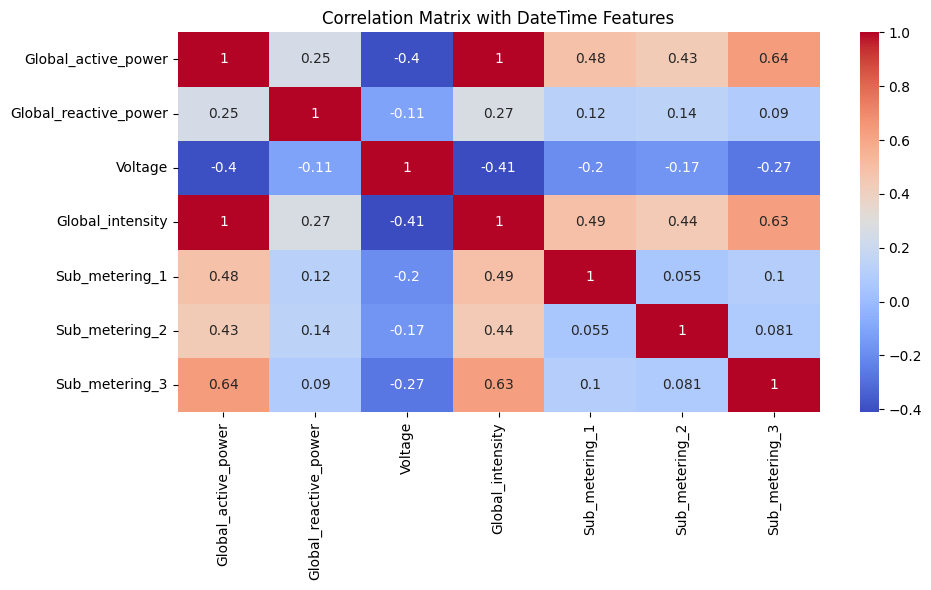

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv(r'D:\guvi\project3\household_power_consumption.txt', sep=';', low_memory=False)

# Step 2: Replace missing values represented as "?" with NaN
df.replace('?', pd.NA, inplace=True)

# Step 3: Convert columns to appropriate data types
for col in df.columns[2:]:  # skip 'Date' and 'Time'
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 4: Convert Date and Time to a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')

# Step 5: Drop rows with invalid or missing datetime
df.dropna(subset=['DateTime'], inplace=True)

# Step 6: Extract useful datetime features
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Drop original 'Date' and 'Time' if not needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Step 7: Create correlation matrix on numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Step 8: Plot heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with DateTime Features')
plt.savefig("D:/guvi/project3/visualization/correlation_matrix.png", format='png', dpi=300)
plt.tight_layout()
plt.show()


In [10]:
'''from the above heat map i coclude that 
1)global_intensity and global_active_power strongly correlated each other
2)global_active_power and voltage mild negative correlation each other '''

'from the above heat map i coclude that \n1)global_intensity and global_active_power strongly correlated each other\n2)global_active_power and voltage mild negative correlation each other '

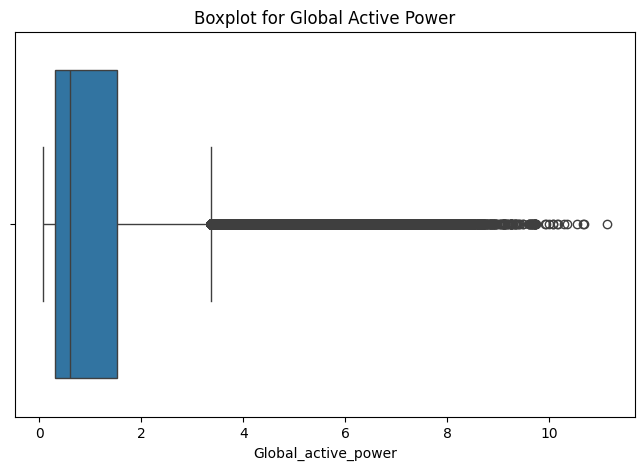

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Global_active_power'])
plt.title('Boxplot for Global Active Power')
plt.show()

In [12]:
q1 = df['Global_active_power'].quantile(0.25)
q3 = df['Global_active_power'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Global_active_power'] < lower_bound) | (df['Global_active_power'] > upper_bound)]

print(f"Outliers count: {len(outliers)}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Outliers count: 94907
Lower Bound: -1.522, Upper Bound: 3.358


In [13]:
df['Global_active_power'] = df['Global_active_power'].clip(lower=lower_bound, upper=upper_bound)


In [14]:
q1 = df['Global_active_power'].quantile(0.25)
q3 = df['Global_active_power'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Global_active_power'] < lower_bound) | (df['Global_active_power'] > upper_bound)]
print(f"Remaining Outliers: {len(outliers)}")


Remaining Outliers: 0


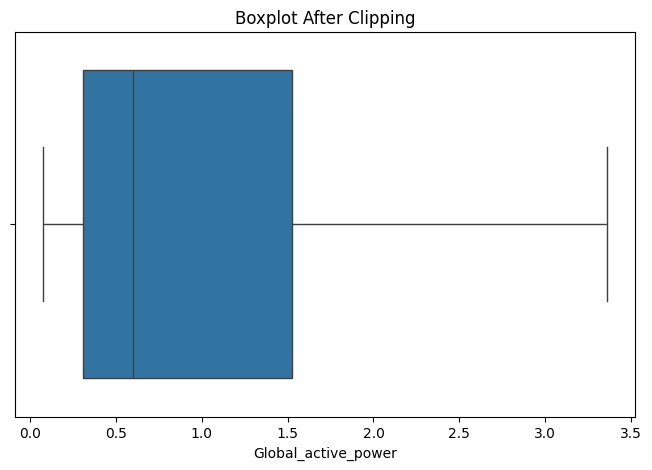

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Global_active_power'])
plt.title('Boxplot After Clipping')
plt.show()


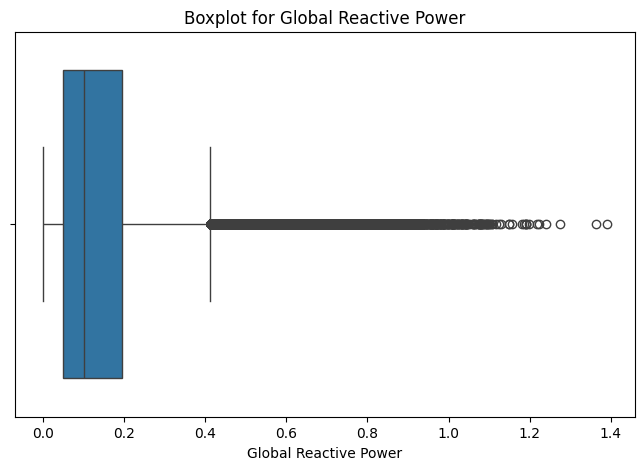

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Global_reactive_power'])
plt.title('Boxplot for Global Reactive Power')
plt.xlabel('Global Reactive Power')
plt.show()


Outliers count: 40420


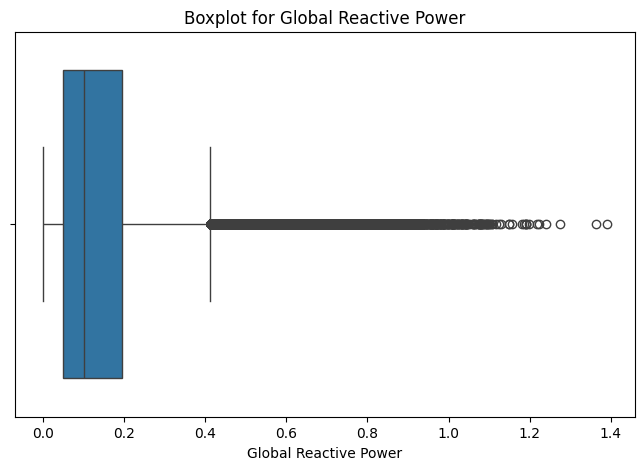

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: IQR Calculate
q1 = df['Global_reactive_power'].quantile(0.25)
q3 = df['Global_reactive_power'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 2: Count Outliers
outliers = df[(df['Global_reactive_power'] < lower_bound) | (df['Global_reactive_power'] > upper_bound)]
print(f"Outliers count: {len(outliers)}")

# Step 3: Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Global_reactive_power'])
plt.title('Boxplot for Global Reactive Power')
plt.xlabel('Global Reactive Power')
plt.show()


In [18]:
df['Global_reactive_power'] = df['Global_reactive_power'].clip(lower=lower_bound, upper=upper_bound)


In [19]:
remaining_outliers = df[(df['Global_reactive_power'] < lower_bound) | (df['Global_reactive_power'] > upper_bound)]
print(f"Remaining Outliers: {len(remaining_outliers)}")


Remaining Outliers: 0


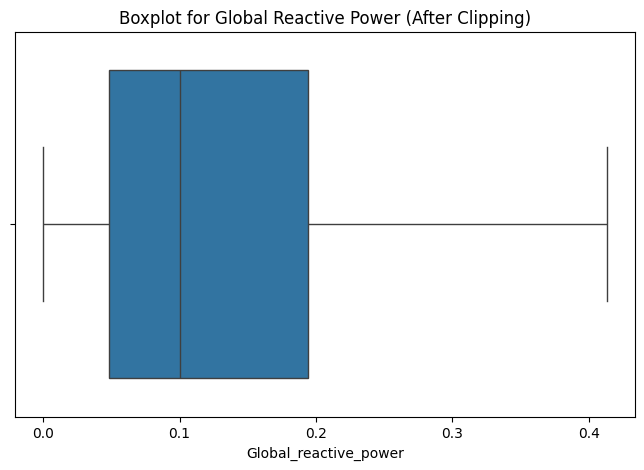

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Global_reactive_power'])
plt.title('Boxplot for Global Reactive Power (After Clipping)')
plt.show()


Voltage Lower Bound: 233.14000000000004
Voltage Upper Bound: 248.73999999999995
Voltage Outliers count: 51067


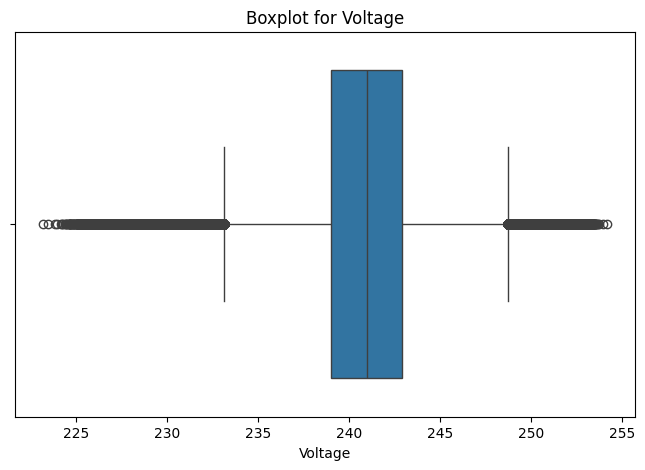

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: IQR calculate karo
q1 = df['Voltage'].quantile(0.25)
q3 = df['Voltage'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Voltage Lower Bound: {lower_bound}")
print(f"Voltage Upper Bound: {upper_bound}")

# Step 2: Outliers count karo
outliers = df[(df['Voltage'] < lower_bound) | (df['Voltage'] > upper_bound)]
print(f"Voltage Outliers count: {len(outliers)}")

# Step 3: Boxplot banao
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Voltage'])
plt.title('Boxplot for Voltage')
plt.xlabel('Voltage')
plt.show()


In [22]:
df['Voltage'] = df['Voltage'].clip(lower=233.14, upper=248.74)


In [23]:
remaining_outliers = df[(df['Voltage'] < 233.14) | (df['Voltage'] > 248.74)]
print(f"Remaining Voltage Outliers: {len(remaining_outliers)}")


Remaining Voltage Outliers: 0


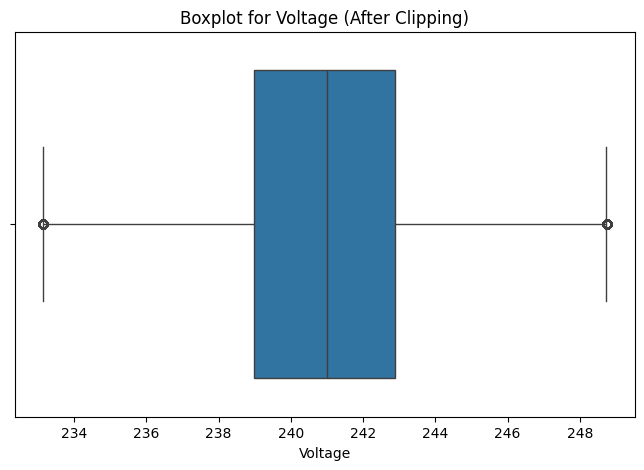

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Voltage'])
plt.title('Boxplot for Voltage (After Clipping)')
plt.xlabel('Voltage')
plt.show()

Global_intensity Lower Bound: -6.1
Global_intensity Upper Bound: 13.9
Global_intensity Outliers count: 100961


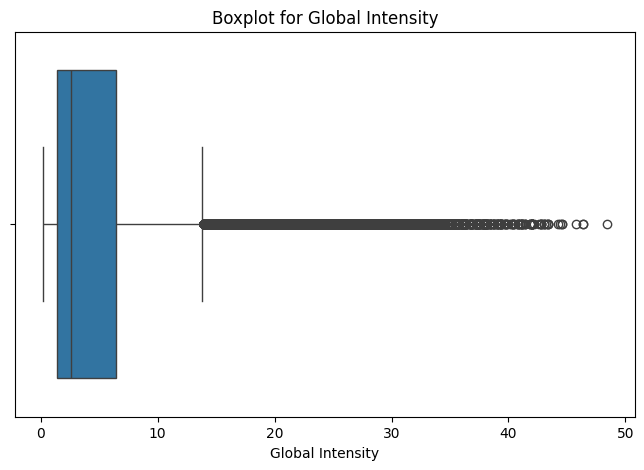

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: IQR calculate karo
q1 = df['Global_intensity'].quantile(0.25)
q3 = df['Global_intensity'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Global_intensity Lower Bound: {lower_bound}")
print(f"Global_intensity Upper Bound: {upper_bound}")

# Step 2: Outliers count karo
outliers = df[(df['Global_intensity'] < lower_bound) | (df['Global_intensity'] > upper_bound)]
print(f"Global_intensity Outliers count: {len(outliers)}")

# Step 3: Boxplot banao
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Global_intensity'])
plt.title('Boxplot for Global Intensity')
plt.xlabel('Global Intensity')
plt.show()


In [84]:
#  IQR calculate 
q1 = df['Global_intensity'].quantile(0.25)
q3 = df['Global_intensity'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# clip 
df['Global_intensity'] = df['Global_intensity'].clip(lower=lower_bound, upper=upper_bound)


Outliers count after clipping: 0


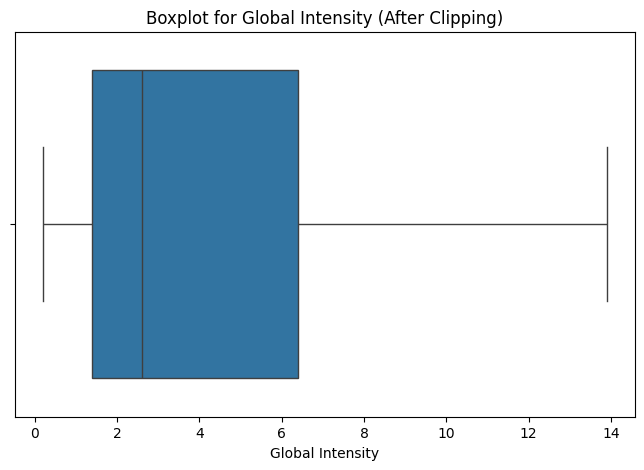

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# IQR calculate 
q1 = df['Global_intensity'].quantile(0.25)
q3 = df['Global_intensity'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Clip 
df['Global_intensity'] = df['Global_intensity'].clip(lower=lower_bound, upper=upper_bound)

# after Clip 
outliers_after_clip = df[(df['Global_intensity'] < lower_bound) | (df['Global_intensity'] > upper_bound)]
print(f"Outliers count after clipping: {len(outliers_after_clip)}")

# Boxplot plot 
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Global_intensity'])
plt.title('Boxplot for Global Intensity (After Clipping)')
plt.xlabel('Global Intensity')
plt.savefig("D:/guvi/project3/visualization/box_plot.png", format='png', dpi=300)
plt.show()


In [74]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

scaler = StandardScaler()
df_standard = df.copy()  # Original data safe 

df_standard[cols_to_scale] = scaler.fit_transform(df_standard[cols_to_scale])

print("Standardized Data (first 5 rows):")
print(df_standard[cols_to_scale].head())


Standardized Data (first 5 rows):
   Global_active_power  Global_reactive_power   Voltage  Global_intensity
0             2.522003               2.743463 -1.919123          2.496284
1             2.522003               2.743463 -2.304722          2.496284
2             2.522003               2.743463 -2.413073          2.496284
3             2.522003               2.743463 -2.269668          2.496284
4             2.522003               2.743463 -1.651434          2.496284


In [29]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
Hour                         0
Day                          0
Month                        0
Weekday                      0
dtype: int64

In [30]:
print(len(df))


2075259


In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
Hour                     0
Day                      0
Month                    0
Weekday                  0
dtype: int64

In [33]:
print(df.columns.tolist())

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'DateTime', 'Hour', 'Day', 'Month', 'Weekday']


In [34]:
#daily averages

In [35]:
df['Date'] = df['DateTime'].dt.date  # sirf date part nikalo
daily_avg = df.groupby('Date')['Global_active_power'].mean().reset_index()
daily_avg.columns = ['Date', 'Daily_avg_power']


In [36]:
df = df.merge(daily_avg, on='Date', how='left')


In [37]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Hour,Day,Month,Weekday,Date,Daily_avg_power
0,3.358,0.413,234.84,13.9,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12,5,2006-12-16,2.852621
1,3.358,0.413,233.63,13.9,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12,5,2006-12-16,2.852621
2,3.358,0.413,233.29,13.9,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12,5,2006-12-16,2.852621
3,3.358,0.413,233.74,13.9,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,12,5,2006-12-16,2.852621
4,3.358,0.413,235.68,13.9,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,12,5,2006-12-16,2.852621


In [38]:
#peak hour
df['Peak_hour'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 21 else 0)


In [39]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Hour,Day,Month,Weekday,Date,Daily_avg_power,Peak_hour
0,3.358,0.413,234.84,13.9,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12,5,2006-12-16,2.852621,0
1,3.358,0.413,233.63,13.9,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12,5,2006-12-16,2.852621,0
2,3.358,0.413,233.29,13.9,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12,5,2006-12-16,2.852621,0
3,3.358,0.413,233.74,13.9,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,12,5,2006-12-16,2.852621,0
4,3.358,0.413,235.68,13.9,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,12,5,2006-12-16,2.852621,0


In [40]:
#rolling averages
df = df.sort_values('DateTime')
df['Rolling_3hr'] = df['Global_active_power'].rolling(window=3).mean()
df['Rolling_24hr'] = df['Global_active_power'].rolling(window=24).mean()


In [41]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Hour,Day,Month,Weekday,Date,Daily_avg_power,Peak_hour,Rolling_3hr,Rolling_24hr
0,3.358,0.413,234.84,13.9,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12,5,2006-12-16,2.852621,0,NaN,NaN
1,3.358,0.413,233.63,13.9,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12,5,2006-12-16,2.852621,0,NaN,NaN
2,3.358,0.413,233.29,13.9,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12,5,2006-12-16,2.852621,0,3.358,NaN
3,3.358,0.413,233.74,13.9,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,12,5,2006-12-16,2.852621,0,3.358,NaN
4,3.358,0.413,235.68,13.9,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,12,5,2006-12-16,2.852621,0,3.358,NaN


In [42]:
df['Lag_1'] = df['Global_active_power'].shift(1)
df['Lag_24'] = df['Global_active_power'].shift(24)


In [43]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Hour,Day,Month,Weekday,Date,Daily_avg_power,Peak_hour,Rolling_3hr,Rolling_24hr,Lag_1,Lag_24
0,3.358,0.413,234.84,13.9,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12,5,2006-12-16,2.852621,0,NaN,NaN,NaN,NaN
1,3.358,0.413,233.63,13.9,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12,5,2006-12-16,2.852621,0,NaN,NaN,3.358,NaN
2,3.358,0.413,233.29,13.9,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12,5,2006-12-16,2.852621,0,3.358,NaN,3.358,NaN
3,3.358,0.413,233.74,13.9,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,12,5,2006-12-16,2.852621,0,3.358,NaN,3.358,NaN
4,3.358,0.413,235.68,13.9,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,12,5,2006-12-16,2.852621,0,3.358,NaN,3.358,NaN


Correlation with Global_active_power:
 Global_active_power      1.000000
Global_intensity         0.998724
Sub_metering_3           0.688706
Sub_metering_1           0.409687
Sub_metering_2           0.353125
Global_reactive_power    0.232943
Voltage                 -0.392132
Name: Global_active_power, dtype: float64


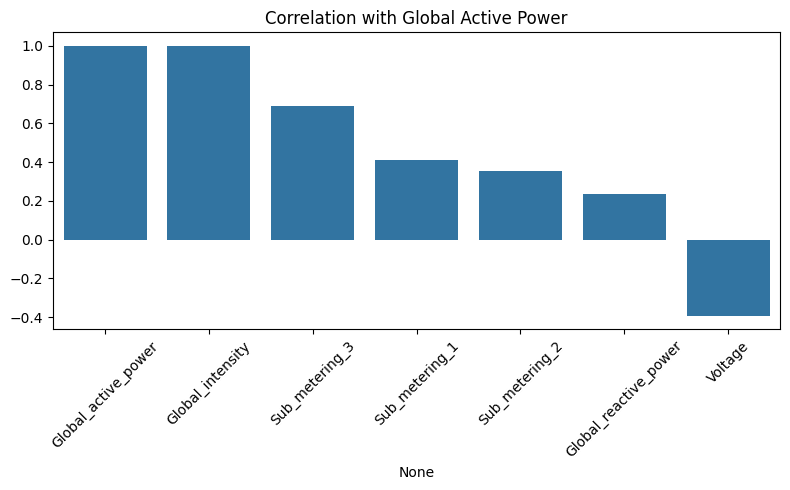

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only numerical columns
numerical_cols = ['Global_reactive_power', 'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Correlation with target
correlation = df[numerical_cols + ['Global_active_power']].corr()
target_corr = correlation['Global_active_power'].sort_values(ascending=False)

# Print and visualize
print("Correlation with Global_active_power:\n", target_corr)

plt.figure(figsize=(8,5))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.title("Correlation with Global Active Power")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("D:/guvi/project3/visualization/correlation_gloabal_active_power.png", format='png', dpi=300)
plt.show()


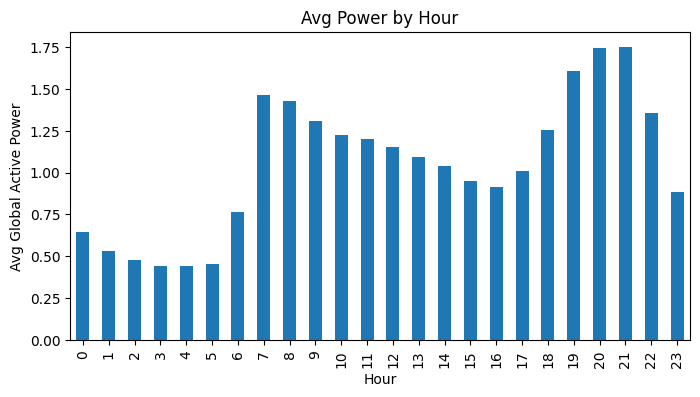

In [71]:
# Group and plot average consumption by hour
df.groupby('Hour')['Global_active_power'].mean().plot(kind='bar', figsize=(8,4), title='Avg Power by Hour')
plt.ylabel('Avg Global Active Power')
plt.savefig("D:/guvi/project3/visualization/consumption_trend_by_hour.png", format='png', dpi=300)
plt.show()


In [46]:
df['GAP_rolling_3'] = df['Global_active_power'].rolling(window=3).mean()
df['GAP_rolling_6'] = df['Global_active_power'].rolling(window=6).mean()
df['GAP_lag_1'] = df['Global_active_power'].shift(1)
df['GAP_lag_2'] = df['Global_active_power'].shift(2)
df['Is_peak_hour'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 21 else 0)


In [47]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Hour,Day,...,Peak_hour,Rolling_3hr,Rolling_24hr,Lag_1,Lag_24,GAP_rolling_3,GAP_rolling_6,GAP_lag_1,GAP_lag_2,Is_peak_hour
0,3.358,0.413,234.84,13.9,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3.358,0.413,233.63,13.9,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,...,0,NaN,NaN,3.358,NaN,NaN,NaN,3.358,NaN,0
2,3.358,0.413,233.29,13.9,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,...,0,3.358,NaN,3.358,NaN,3.358,NaN,3.358,3.358,0
3,3.358,0.413,233.74,13.9,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,...,0,3.358,NaN,3.358,NaN,3.358,NaN,3.358,3.358,0
4,3.358,0.413,235.68,13.9,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,...,0,3.358,NaN,3.358,NaN,3.358,NaN,3.358,3.358,0


In [48]:
# Model Selection and Training
from sklearn.model_selection import train_test_split

# Drop rows with NaNs (important for lag/rolling/normalized data)
df_model = df.dropna()

# Target and features
y = df_model['Global_active_power']
X = df_model.drop(columns=['Global_active_power', 'DateTime'])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [49]:
X_train.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Month,Weekday,...,Peak_hour,Rolling_3hr,Rolling_24hr,Lag_1,Lag_24,GAP_rolling_3,GAP_rolling_6,GAP_lag_1,GAP_lag_2,Is_peak_hour
531505,0.304,243.62,3.6,0.0,0.0,0.0,13,23,12,6,...,0,0.839333,0.755750,0.840,0.546,0.839333,0.843667,0.840,0.840,0
1438048,0.118,243.71,1.2,0.0,1.0,1.0,3,16,9,2,...,0,0.264000,0.318500,0.264,0.344,0.264000,0.263667,0.264,0.264,0
744250,0.054,235.90,13.9,0.0,0.0,18.0,7,19,5,0,...,0,3.358000,2.803750,3.358,0.594,3.358000,3.358000,3.358,3.358,0
152075,0.288,237.97,13.9,0.0,0.0,17.0,8,1,4,6,...,0,3.358000,2.577333,3.358,1.628,3.358000,3.187667,3.358,3.358,0
1982220,0.316,240.52,8.4,0.0,1.0,18.0,7,11,10,0,...,0,2.032667,2.717667,2.038,2.516,2.032667,2.227667,2.038,2.036,0


In [50]:
print(X.dtypes)


Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Hour                       int32
Day                        int32
Month                      int32
Weekday                    int32
Date                      object
Daily_avg_power          float64
Peak_hour                  int64
Rolling_3hr              float64
Rolling_24hr             float64
Lag_1                    float64
Lag_24                   float64
GAP_rolling_3            float64
GAP_rolling_6            float64
GAP_lag_1                float64
GAP_lag_2                float64
Is_peak_hour               int64
dtype: object


In [51]:
X = X.drop(columns=['Date'])


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df_model['Global_active_power']  # assuming this is your target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [53]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=20,n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [54]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


In [55]:
#Neural Network (MLP)
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)


In [56]:
#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Model names and their predictions
models = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Neural Network': y_pred_mlp 
}

# Evaluation results
for name, y_pred in models.items():
    print(f"\nModel: {name}")
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE : {mae:.4f}")
    print(f"  R²  : {r2:.4f}")



Model: Linear Regression
  RMSE: 0.0000
  MAE : 0.0000
  R²  : 1.0000

Model: Random Forest
  RMSE: 0.0178
  MAE : 0.0063
  R²  : 0.9996

Model: Gradient Boosting
  RMSE: 0.0349
  MAE : 0.0215
  R²  : 0.9986

Model: Neural Network
  RMSE: 0.0081
  MAE : 0.0059
  R²  : 0.9999


In [58]:
#from above comparison Random Forest RMSE: 0.0178, MAE: 0.0063, R²: 0.9996 ,Very accurate and stable.
# Good generalization.
#but i go with Neural Network for best accuracy perpose
#Model can accurately predict energy usage with very low error, indicating a strong generalization over unseen data.

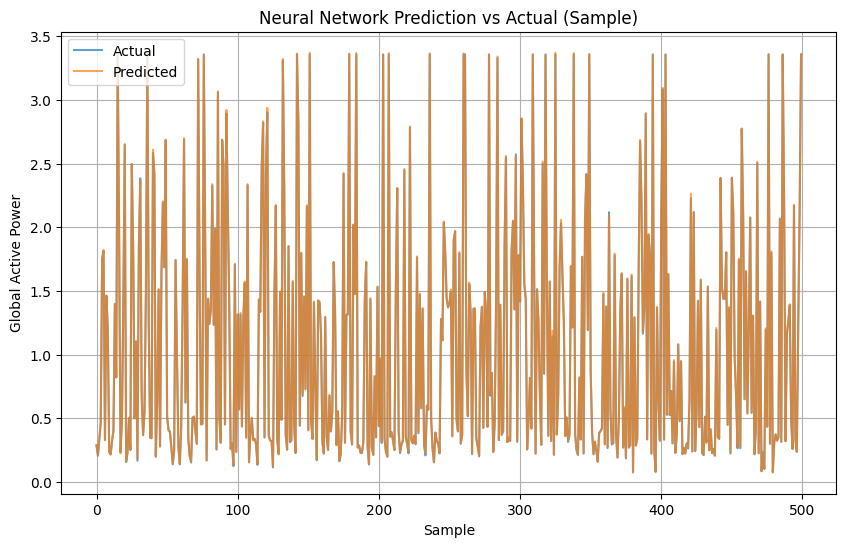

In [70]:
#actual plot vs predicted plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:500], label='Actual', alpha=0.7)
plt.plot(y_pred_mlp[:500], label='Predicted', alpha=0.7)
plt.title("Neural Network Prediction vs Actual (Sample)")
plt.xlabel("Sample")
plt.ylabel("Global Active Power")
plt.legend()
plt.grid(True)
plt.savefig("D:/guvi/project3/visualization/energy_usage_trend.png", format='png', dpi=300)
plt.show()


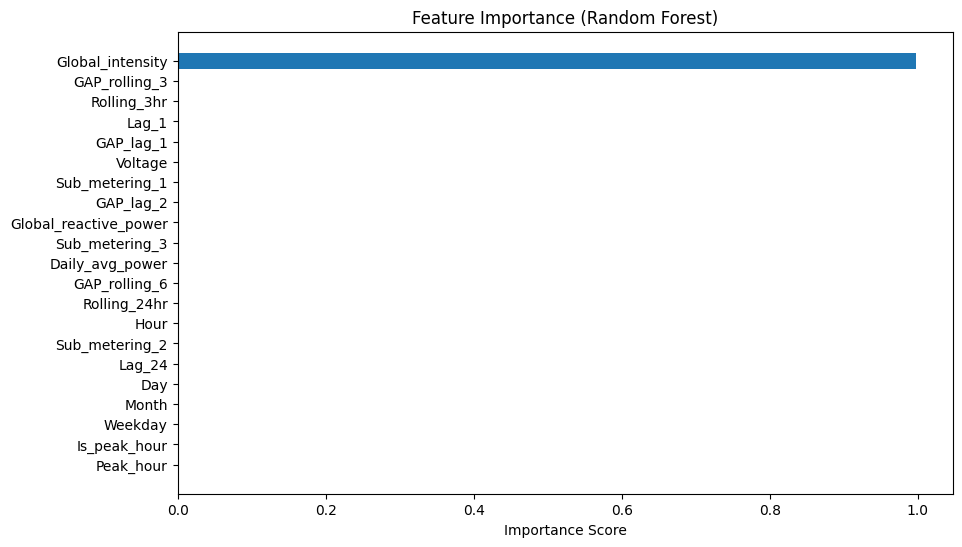

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importances = rf_model.feature_importances_
features = X_train.columns[:len(rf_importances)]  # Use correct number of features
importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.savefig("D:/guvi/project3/visualization/rf_feature_importance.png", format='png', dpi=300)
plt.show()


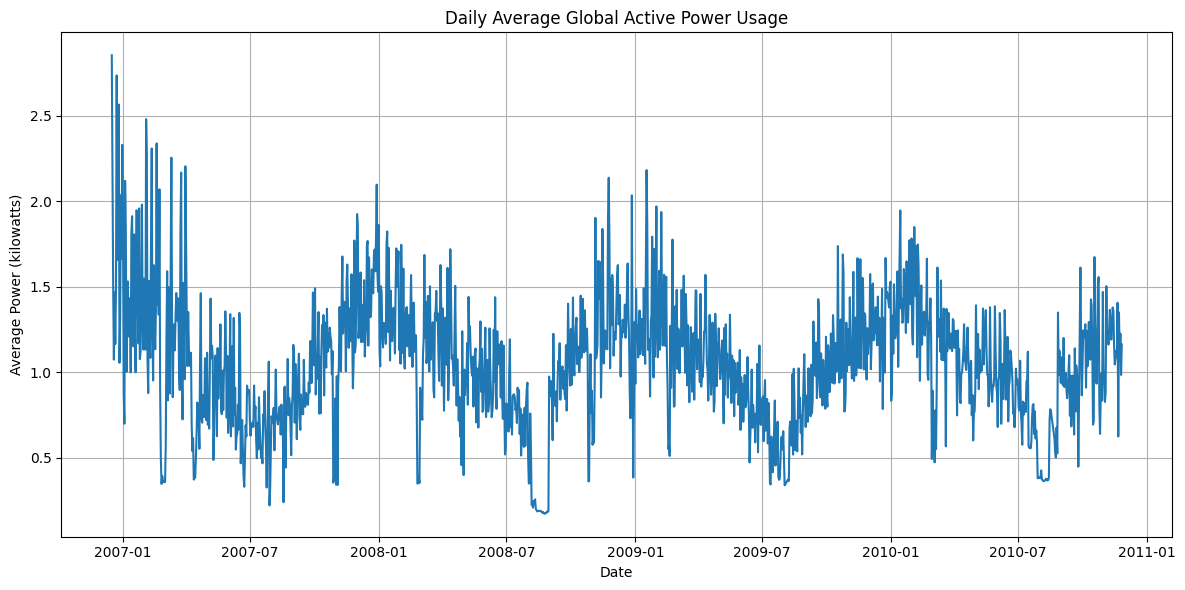

In [68]:
#Daily Power Consumption Trend

daily_avg = df.groupby(df['DateTime'].dt.date)['Global_active_power'].mean()

plt.figure(figsize=(12, 6))
daily_avg.plot()
plt.title("Daily Average Global Active Power Usage")
plt.xlabel("Date")
plt.ylabel("Average Power (kilowatts)")
plt.grid(True)
plt.tight_layout()
plt.savefig("D:/guvi/project3/visualization/Daily_average_global_power.png", format='png', dpi=300)
plt.show()


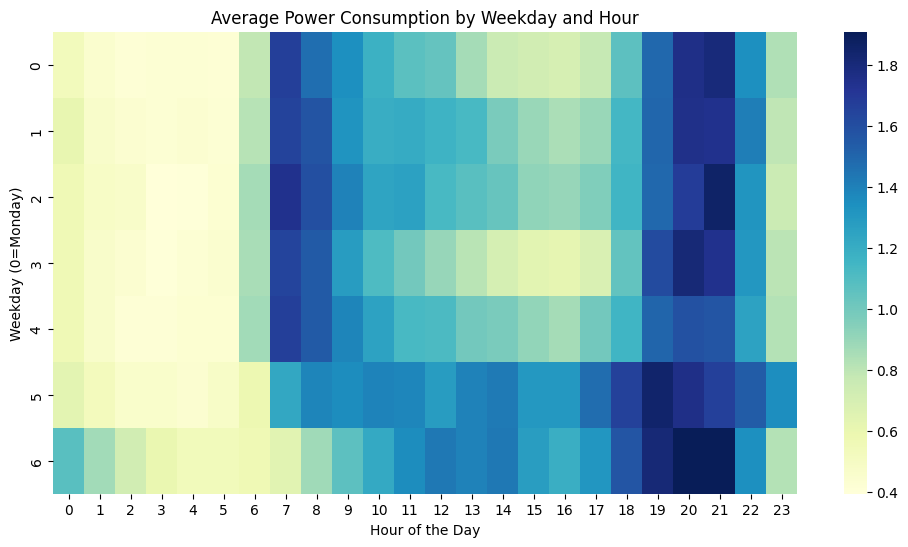

In [67]:
#Energy Usage by Hour (Heatmap)
import seaborn as sns

heatmap_data = df.groupby(['Weekday', 'Hour'])['Global_active_power'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Average Power Consumption by Weekday and Hour")
plt.ylabel("Weekday (0=Monday)")
plt.xlabel("Hour of the Day")
plt.savefig("D:/guvi/project3/visualization/average_power_consumption.png", format='png', dpi=300)
plt.show()


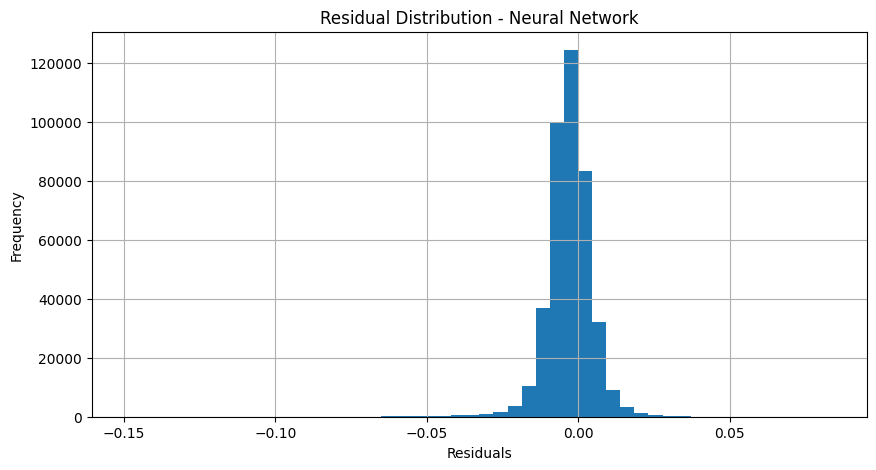

In [66]:
residuals = y_test.values - y_pred_mlp
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50)
plt.title("Residual Distribution - Neural Network")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("D:/guvi/project3/visualization/residual_distribution_neuralnetwork.png", format='png', dpi=300)
plt.show()


In [65]:
import os
os.makedirs("visualizations", exist_ok=True)
